In [2]:
import pandas as pd
import pandas_ta as ta
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np
import talib

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import talib

# list of functions
for name in talib.get_functions():
    print(name)

# dict of functions by group
for group, names in talib.get_function_groups().items():
    print(group)
    for name in names:
        print(f"  {name}")

HT_DCPERIOD
HT_DCPHASE
HT_PHASOR
HT_SINE
HT_TRENDMODE
ADD
DIV
MAX
MAXINDEX
MIN
MININDEX
MINMAX
MINMAXINDEX
MULT
SUB
SUM
ACOS
ASIN
ATAN
CEIL
COS
COSH
EXP
FLOOR
LN
LOG10
SIN
SINH
SQRT
TAN
TANH
ADX
ADXR
APO
AROON
AROONOSC
BOP
CCI
CMO
DX
MACD
MACDEXT
MACDFIX
MFI
MINUS_DI
MINUS_DM
MOM
PLUS_DI
PLUS_DM
PPO
ROC
ROCP
ROCR
ROCR100
RSI
STOCH
STOCHF
STOCHRSI
TRIX
ULTOSC
WILLR
BBANDS
DEMA
EMA
HT_TRENDLINE
KAMA
MA
MAMA
MAVP
MIDPOINT
MIDPRICE
SAR
SAREXT
SMA
T3
TEMA
TRIMA
WMA
CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLL

In [9]:
import pandas as pd
import pandas_ta as ta

# OHLCV 데이터 준비
df = pd.read_csv("/home/cksgh8511/키움/upbit/BTCSPOT.csv",index_col=0)

df.set_index(pd.DatetimeIndex(df["timestamp"]), inplace=True)
# 그다음 컬럼 삭제
df.drop(columns=['timestamp'], inplace=True)

df

,open,high,low,close,volume
timestamp,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...
2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250
2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620
2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050


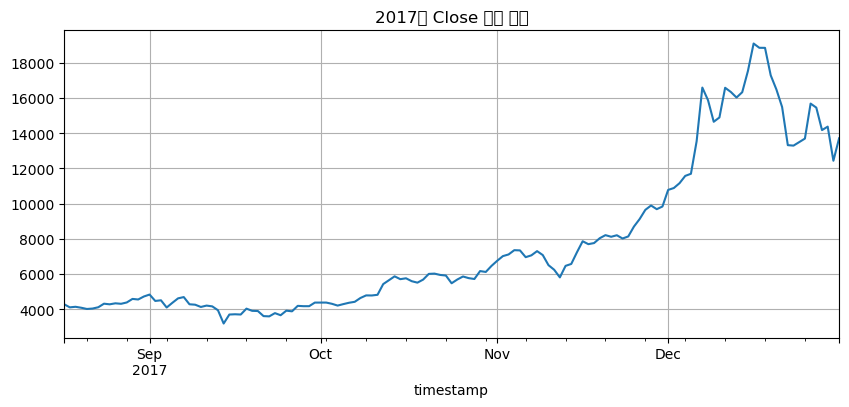

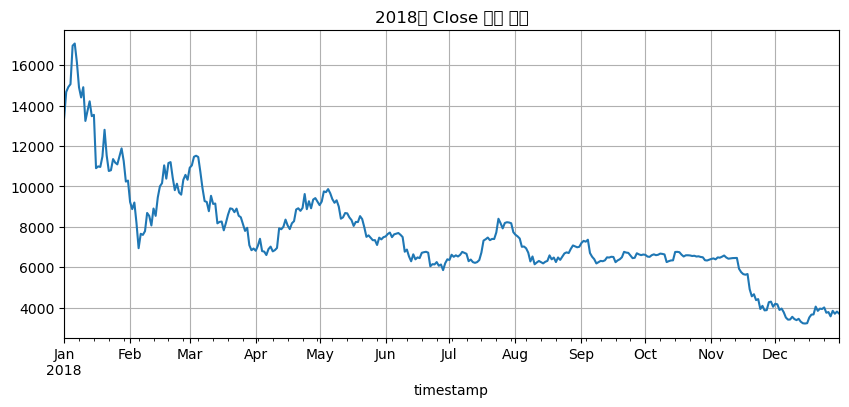

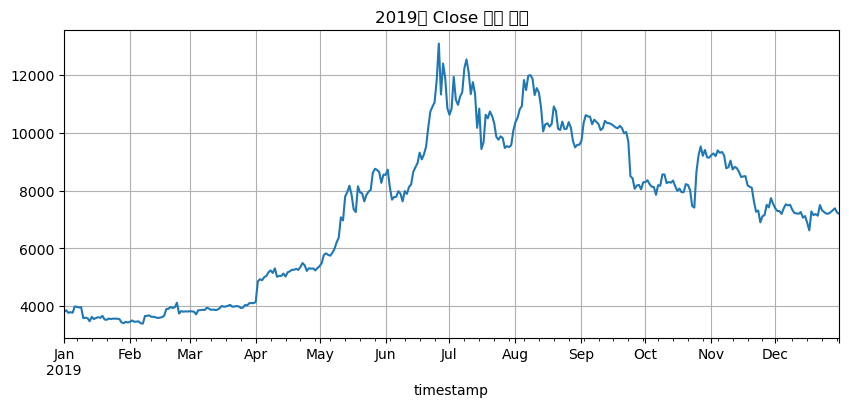

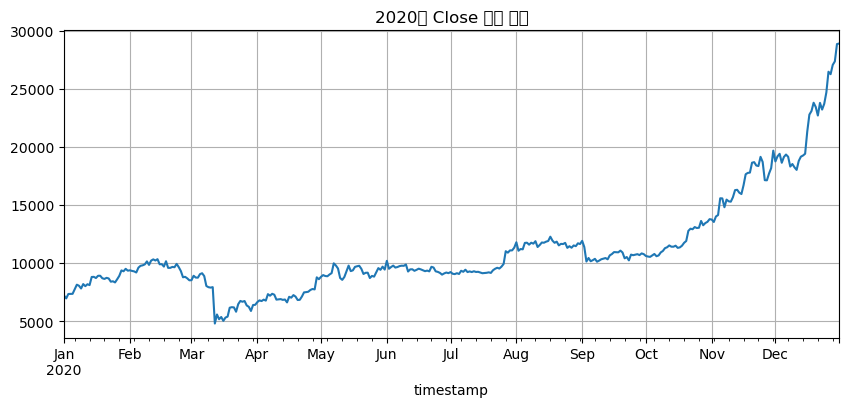

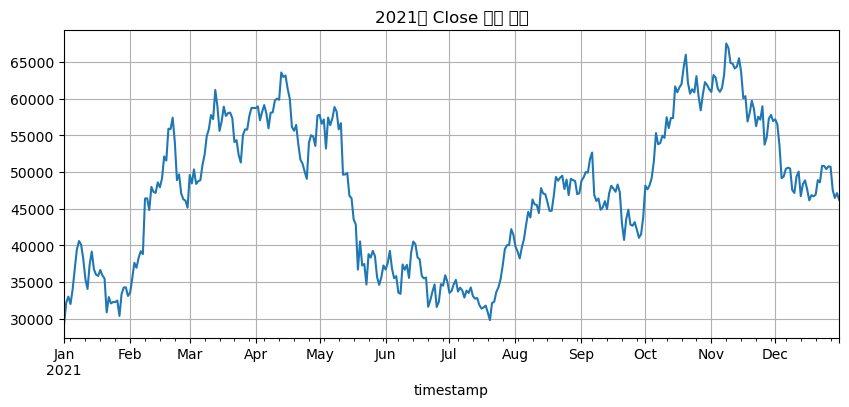

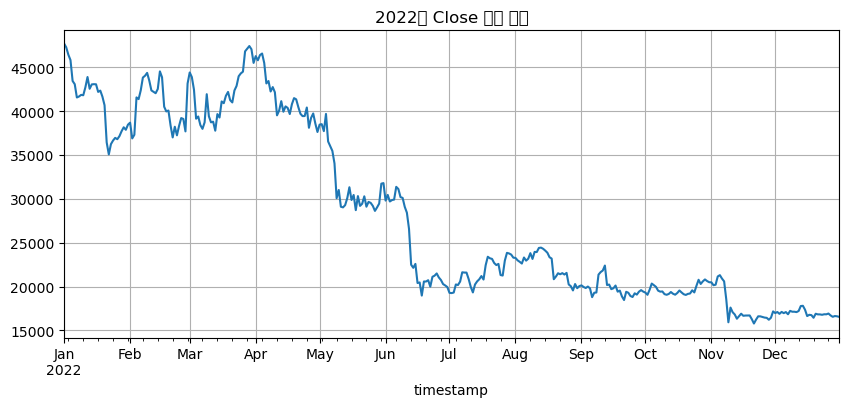

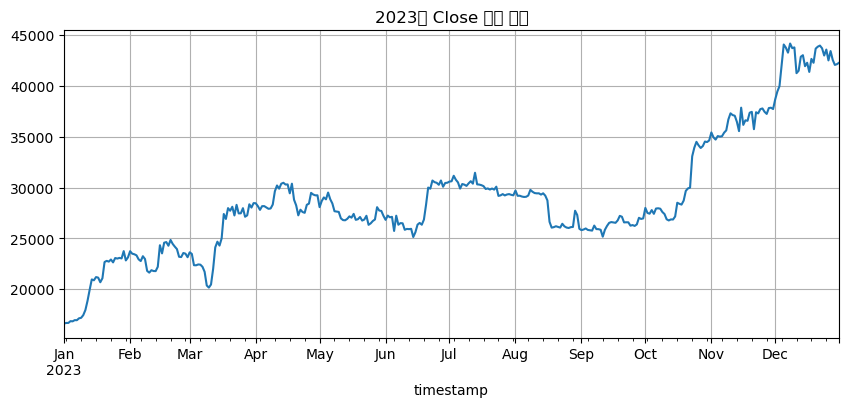

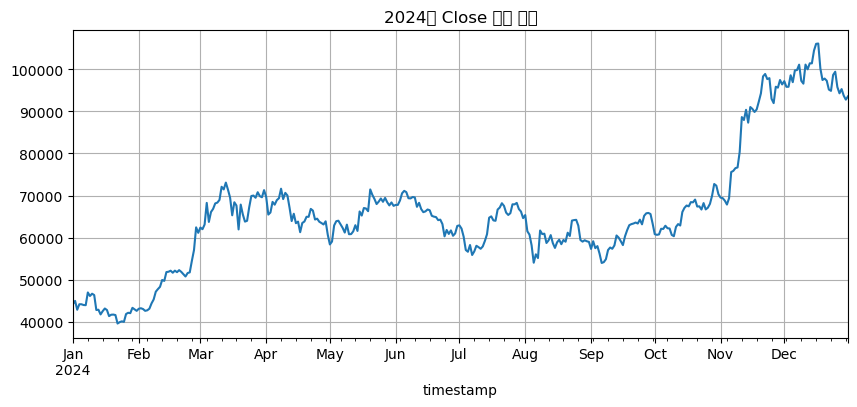

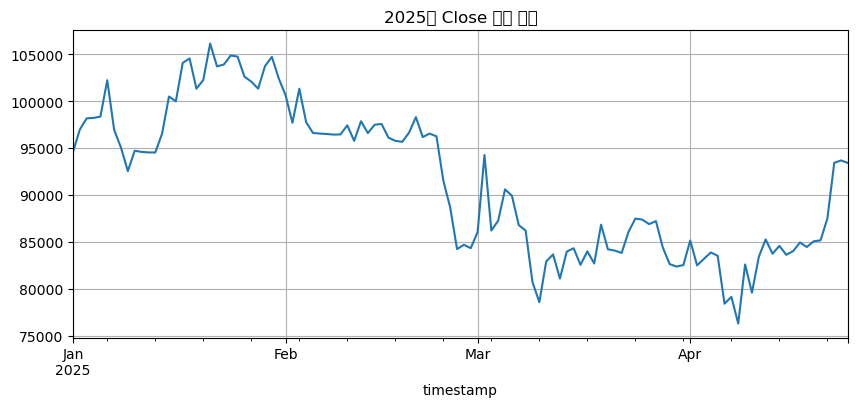

In [46]:
for year in df.index.year.unique():
    close_series = df[df.index.year == year]['close']
    plt.figure(figsize=(10, 4))
    close_series.plot(title=f"{year}년 Close 가격 추이")
    plt.grid()
    plt.show()

In [15]:

def mcgd(close: pd.Series, length: int = 14) -> pd.Series:
    log_returns = np.log(close / close.shift(1))
    log_mean = log_returns.rolling(length).mean()
    deviations = (log_returns - log_mean)**2
    log_var = deviations.rolling(length).mean()
    log_std = np.sqrt(log_var)

    mcg_cell = log_std * 100
    # 문제 되는 append 대신 concat 사용
    mcg_ds = pd.concat([close[:1], mcg_cell[1:]])
    return mcg_ds
def ta_get_all_indicators(df, start=None, end=None):
    if end is None:
        tmp_df = df.copy()    
    else:
        tmp_df = df[0:end]
    tmp_df.ta.strategy('candles')
    tmp_df.ta.strategy('cycles')
    tmp_df.ta.strategy("Momentum") # Default values for all Momentum indicators
    tmp_df.ta.strategy("overlap", length=14,exclude=["mcgd"]) # Override all Overlap 'length' attributes
    tmp_df.ta.strategy('performance')
    tmp_df.ta.strategy('statistics')
    tmp_df.ta.strategy('trend')
    tmp_df.ta.strategy('volatility')
    tmp_df.ta.strategy('volume')
    tmp_df["mcgd_fixed"] = mcgd(tmp_df["close"], length=14)
    
    return tmp_df

In [16]:
df.ta.cores

64

In [17]:
import warnings
warnings.filterwarnings("ignore")

100개 3초
1000개 4초
10000개 14초

In [18]:
tmp_df = df.copy()
tmp_df
ta_df = ta_get_all_indicators(tmp_df)
ta_df

3it [00:00,  4.41it/s]
1it [00:00,  8.55it/s]
39it [00:00, 40.88it/s]
31it [00:00, 32.02it/s]
2it [00:00, 45.33it/s]
10it [00:00, 76.13it/s]
14it [00:00, 40.18it/s]
14it [00:00, 92.28it/s]
14it [00:00, 148.10it/s]


,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,EOM_14_100000000,KVO_34_55_13,KVOs_34_55_13,MFI_14,NVI_1,PVI_1,PVOL,PVR,PVT,mcgd_fixed
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.000000,1000.000000,3.407283e+06,1.0,NaN,4285.080000
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.000000,995.876156,4.929585e+06,3.0,-4.948152e+03,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,995.876156,1.578615e+06,2.0,-4.654770e+03,NaN
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,994.579290,1.908637e+06,3.0,-5.260514e+03,NaN
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,992.859148,2.778040e+06,3.0,-6.450411e+03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250,0.0,0.0,0.0,0.0,0.0,...,5.468148e+09,1234.164299,1382.213639,52.716684,1454.439251,1038.447527,6.892429e+08,2.0,2.791655e+07,2.949107
2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620,0.0,0.0,0.0,0.0,0.0,...,8.690401e+09,1872.839754,1452.303084,67.913125,1454.439251,1041.191141,2.780686e+09,1.0,2.800372e+07,2.964238
2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050,0.0,0.0,0.0,0.0,0.0,...,1.213320e+10,2708.963238,1631.825963,78.033741,1454.439251,1047.963325,4.099601e+09,1.0,2.830084e+07,3.183398


In [19]:
ta_df.to_csv('ta_BTCSPOT.csv')

In [20]:
ta_df

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,EOM_14_100000000,KVO_34_55_13,KVOs_34_55_13,MFI_14,NVI_1,PVI_1,PVOL,PVR,PVT,mcgd_fixed
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.000000,1000.000000,3.407283e+06,1.0,NaN,4285.080000
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.000000,995.876156,4.929585e+06,3.0,-4.948152e+03,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,995.876156,1.578615e+06,2.0,-4.654770e+03,NaN
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,994.579290,1.908637e+06,3.0,-5.260514e+03,NaN
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1000.769405,992.859148,2.778040e+06,3.0,-6.450411e+03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250,0.0,0.0,0.0,0.0,0.0,...,5.468148e+09,1234.164299,1382.213639,52.716684,1454.439251,1038.447527,6.892429e+08,2.0,2.791655e+07,2.949107
2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620,0.0,0.0,0.0,0.0,0.0,...,8.690401e+09,1872.839754,1452.303084,67.913125,1454.439251,1041.191141,2.780686e+09,1.0,2.800372e+07,2.964238
2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050,0.0,0.0,0.0,0.0,0.0,...,1.213320e+10,2708.963238,1631.825963,78.033741,1454.439251,1047.963325,4.099601e+09,1.0,2.830084e+07,3.183398


In [21]:
# 수익률(변화율) 계산
for col in ['open', 'high', 'low', 'close','volume']:
    ta_df[f'{col}_pct'] = ta_df[col].pct_change()
ta_df['pct_change'] = ta_df['close'].pct_change()

In [28]:
periods = [1, 3, 5, 7, 14, 30]  # 원하는 기간 리스트

for p in periods:
    ta_df[f'pct_change_{p}'] = ta_df['close'].pct_change(periods=p)

In [29]:
for p in periods:
    ta_df[f'log_return_{p}'] = np.log(ta_df['close'] / ta_df['close'].shift(p))


In [30]:
ta_df

,open,high,low,close,volume,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,...,pct_change_5,pct_change_7,pct_change_14,pct_change_30,log_return_1,log_return_3,log_return_5,log_return_7,log_return_14,log_return_30
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,-0.042113,NaN,NaN,NaN,NaN,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.007665,NaN,NaN,NaN,NaN,NaN
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,-0.013053,-0.047502,NaN,NaN,NaN,NaN
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,-0.017351,-0.022740,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250,0.0,0.0,0.0,0.0,0.0,...,0.018355,0.016944,0.086054,0.012968,0.001201,0.002719,0.018188,0.016802,0.082551,0.012884
2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620,0.0,0.0,0.0,0.0,0.0,...,0.041483,0.034574,0.105516,0.043841,0.027067,0.035372,0.040646,0.033990,0.100312,0.042907
2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050,0.0,0.0,0.0,0.0,0.0,...,0.100003,0.117151,0.224319,0.085505,0.065527,0.093795,0.095313,0.110782,0.202385,0.082045


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
def chunked_correlation_heatmaps(df, target_cols, chunk_size=15):
    all_cols = df.columns.tolist()

    # 비교 대상에서 타겟 제외
    feature_cols = [col for col in all_cols if col not in target_cols]

    # 피처를 chunk_size씩 자름
    chunks = [feature_cols[i:i + chunk_size] for i in range(0, len(feature_cols), chunk_size)]

    for i, chunk in enumerate(chunks):
        # 상관관계 계산
        selected_cols = target_cols + chunk
        corr = df[selected_cols].dropna().corr()

        # 히트맵 시각화
        plt.figure(figsize=(10,10))
        sns.heatmap(corr.loc[target_cols, chunk], annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
        plt.title(f"상관관계 히트맵 ({i+1}/{len(chunks)}): 주요 지표 vs 피처 {i*chunk_size + 1} ~ {(i+1)*chunk_size}")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

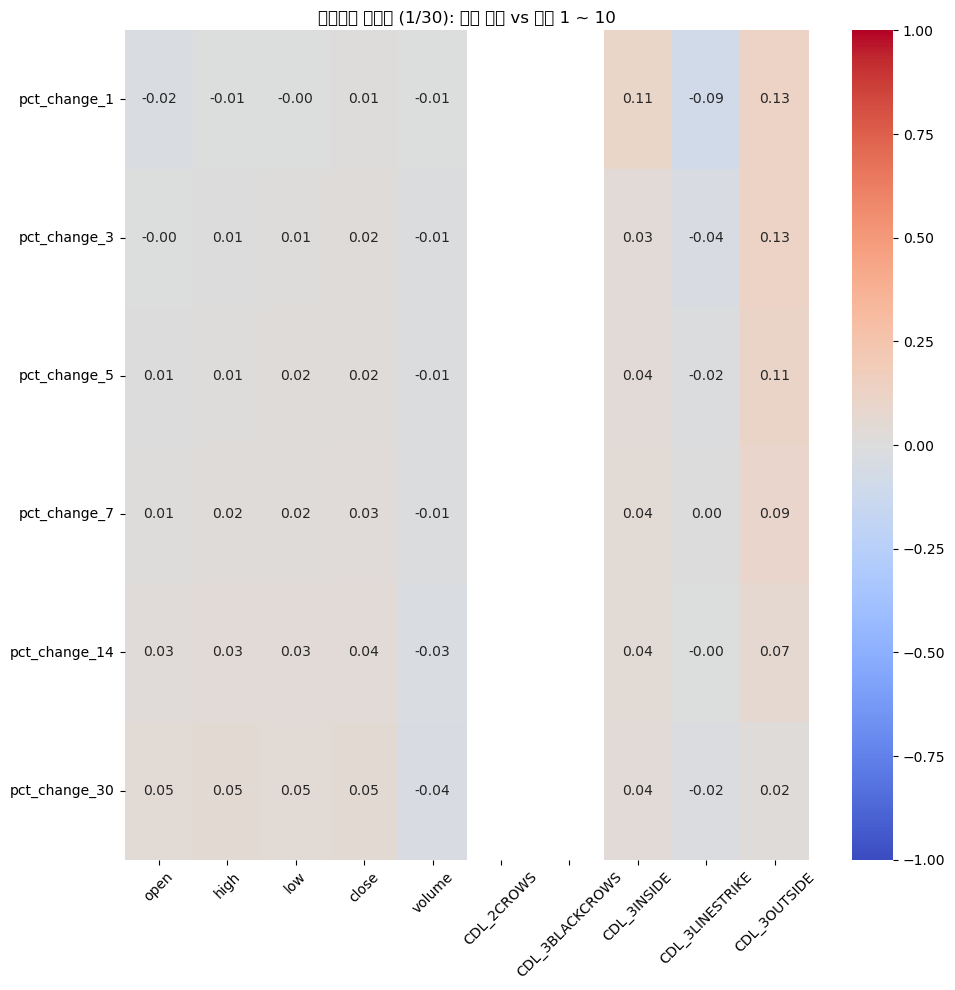

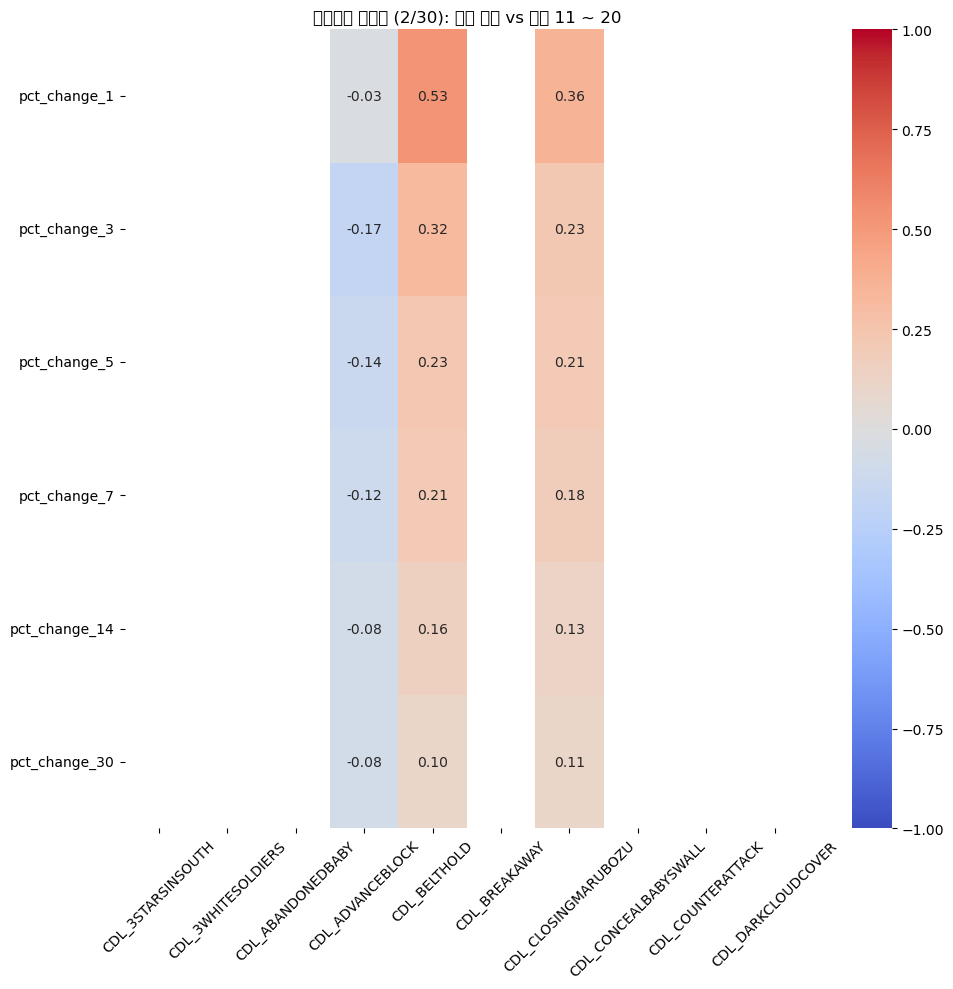

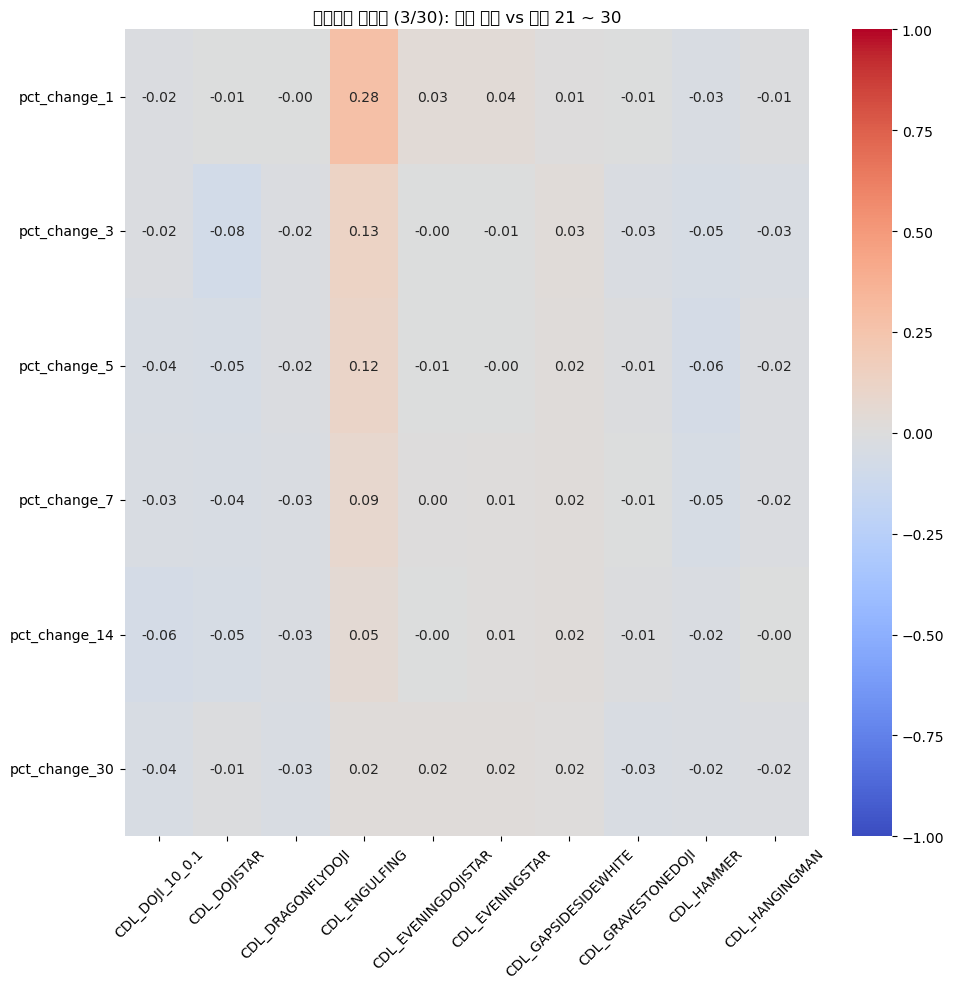

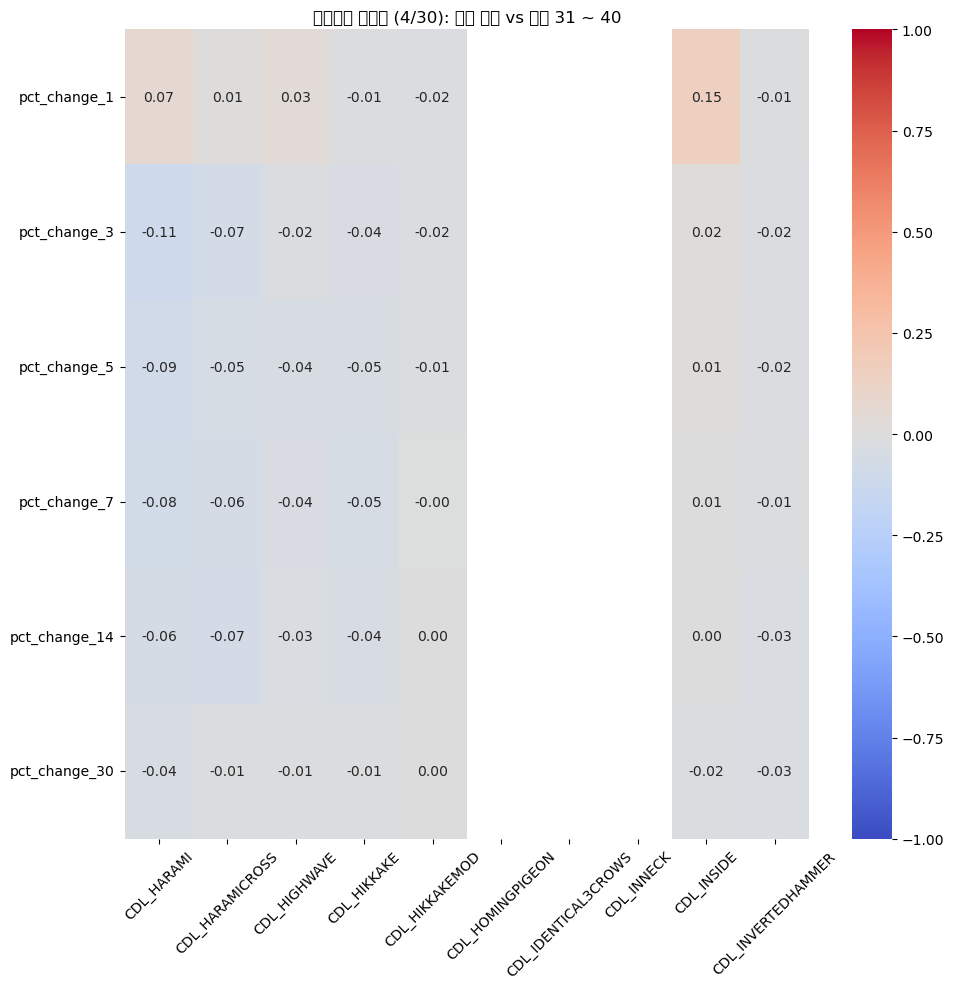

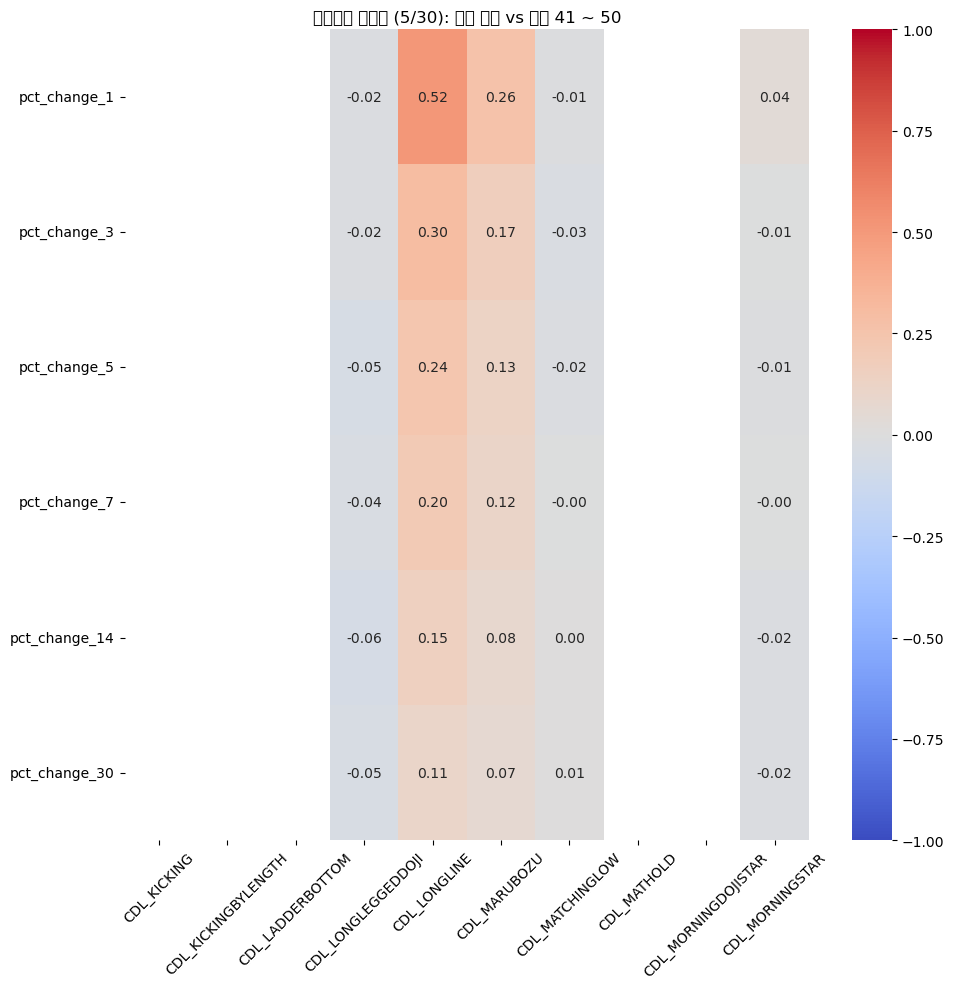

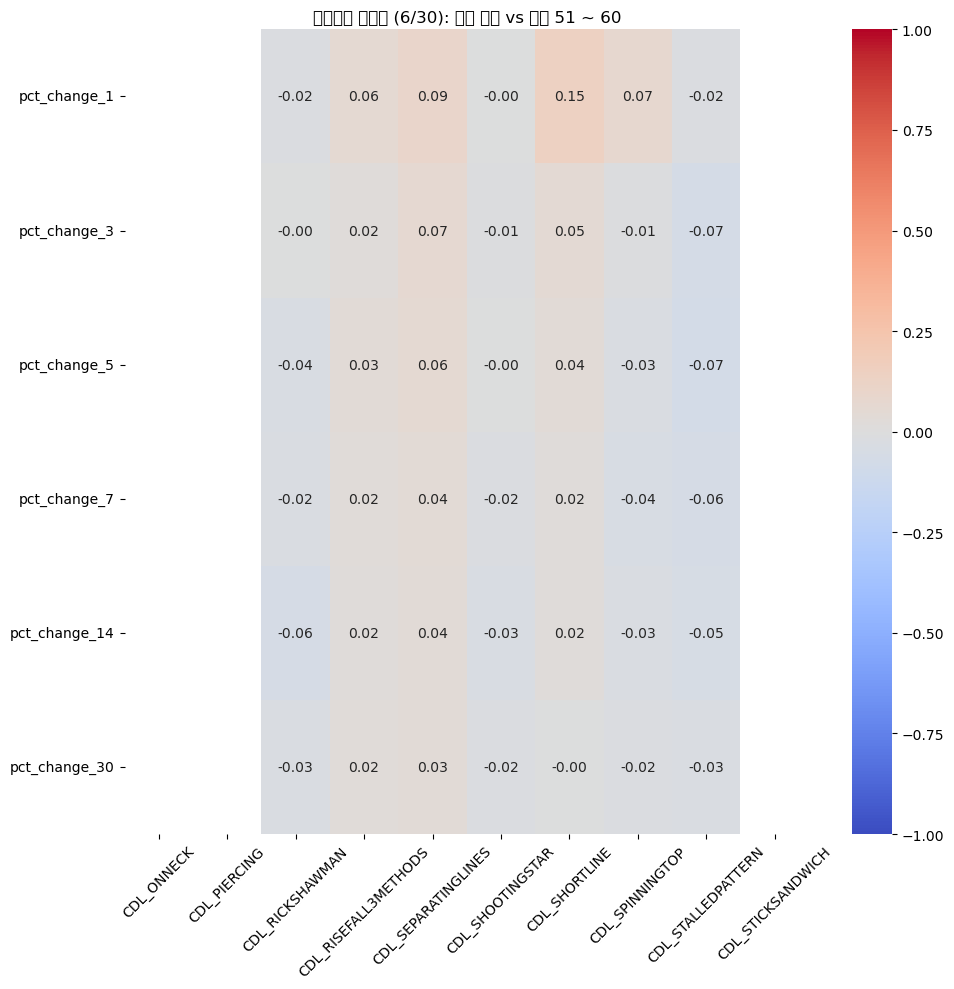

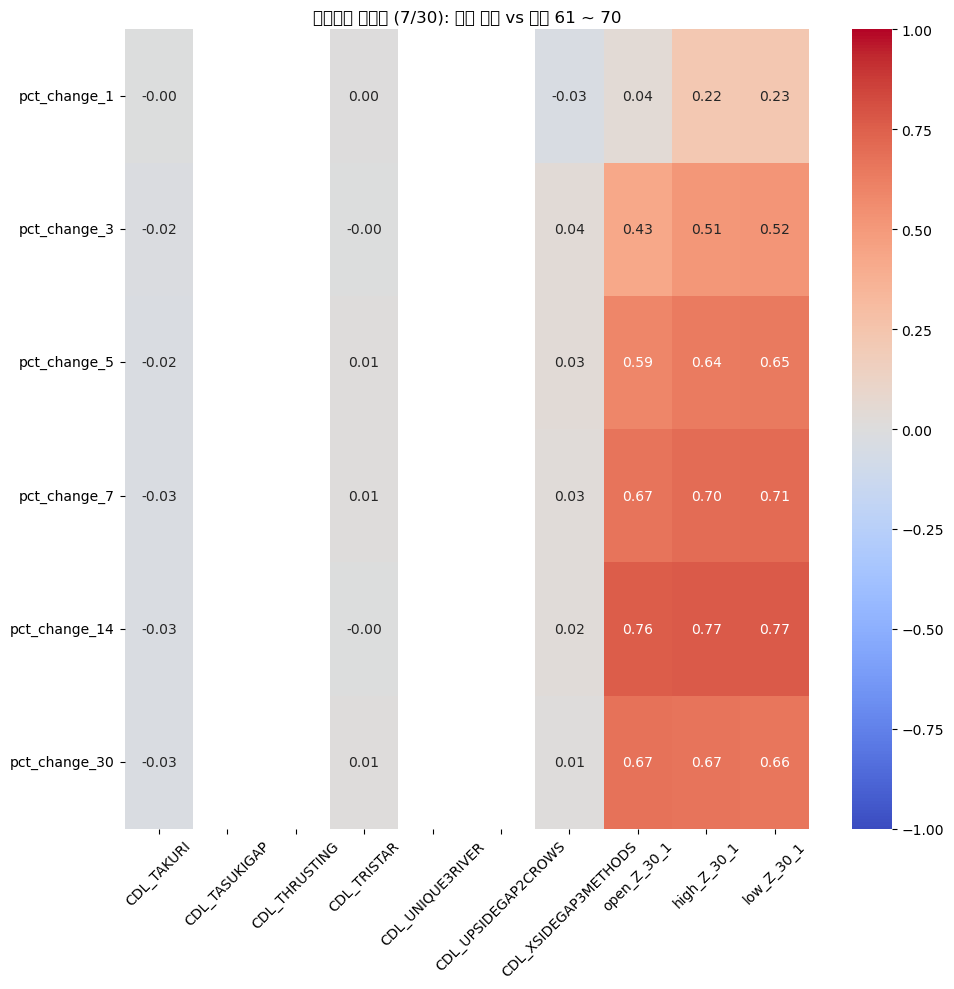

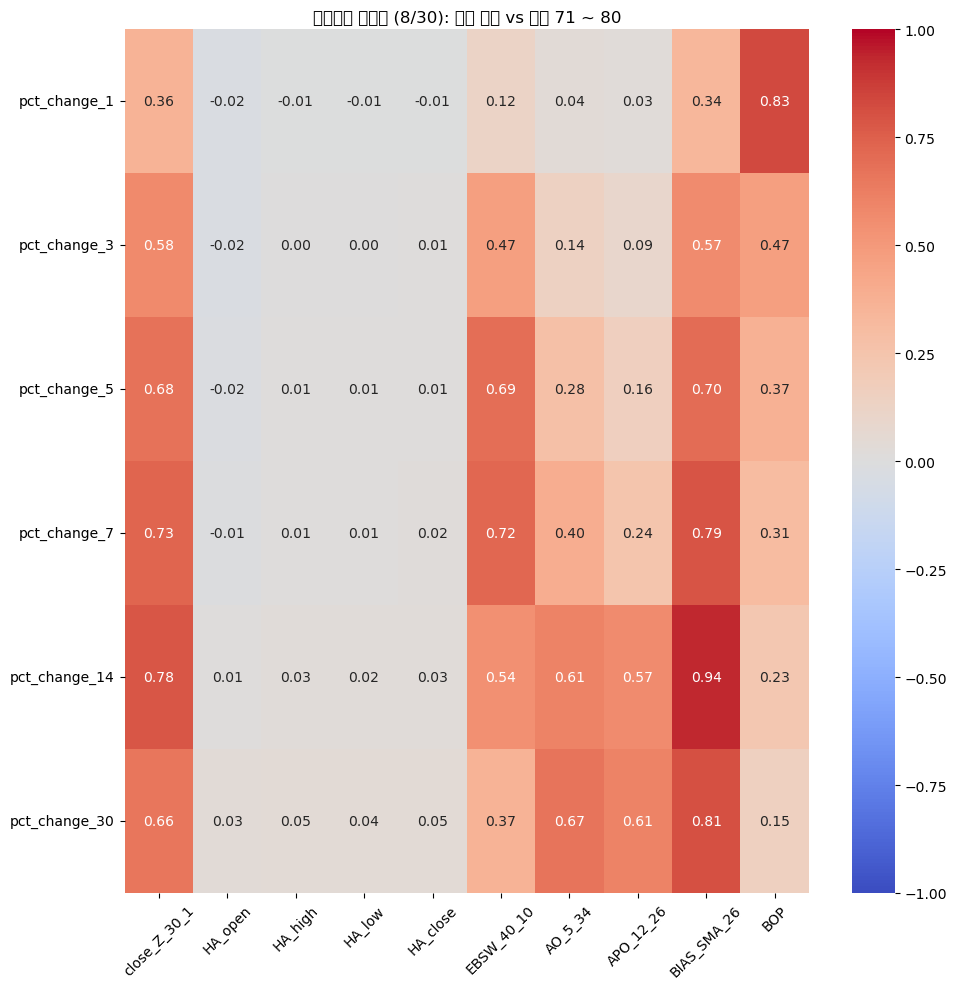

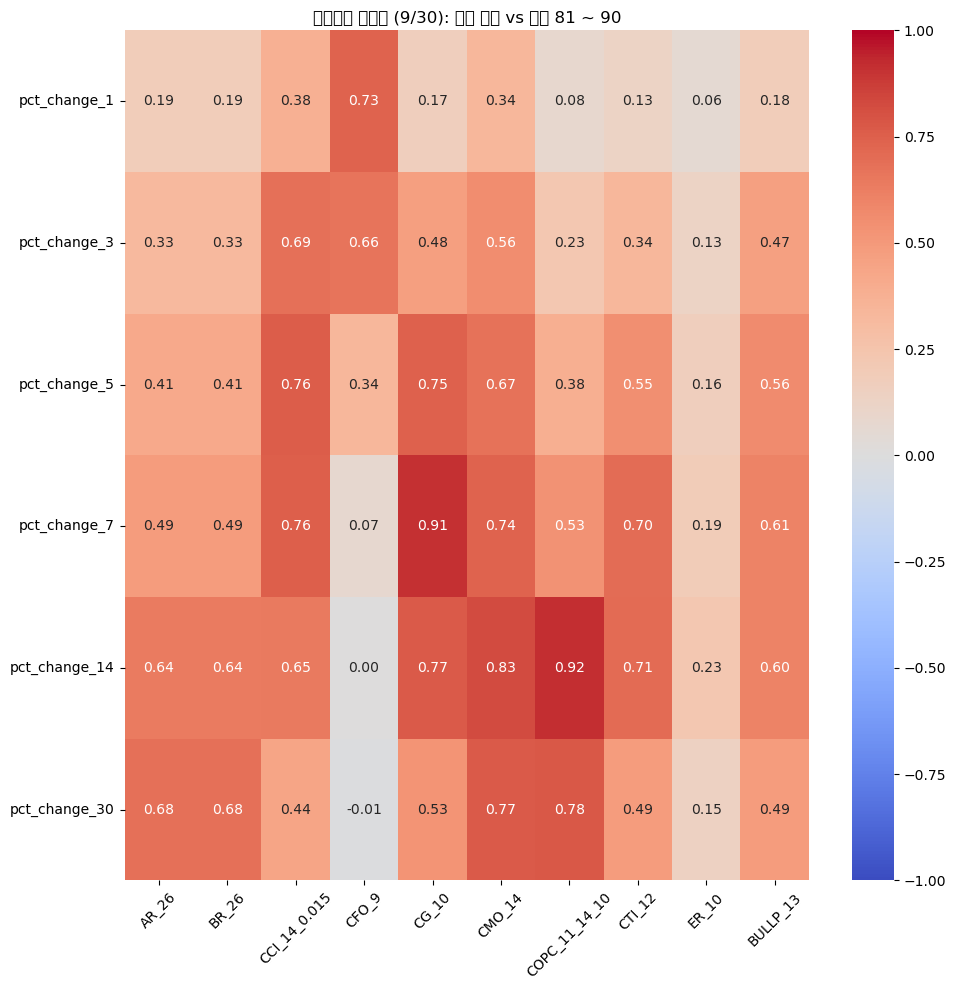

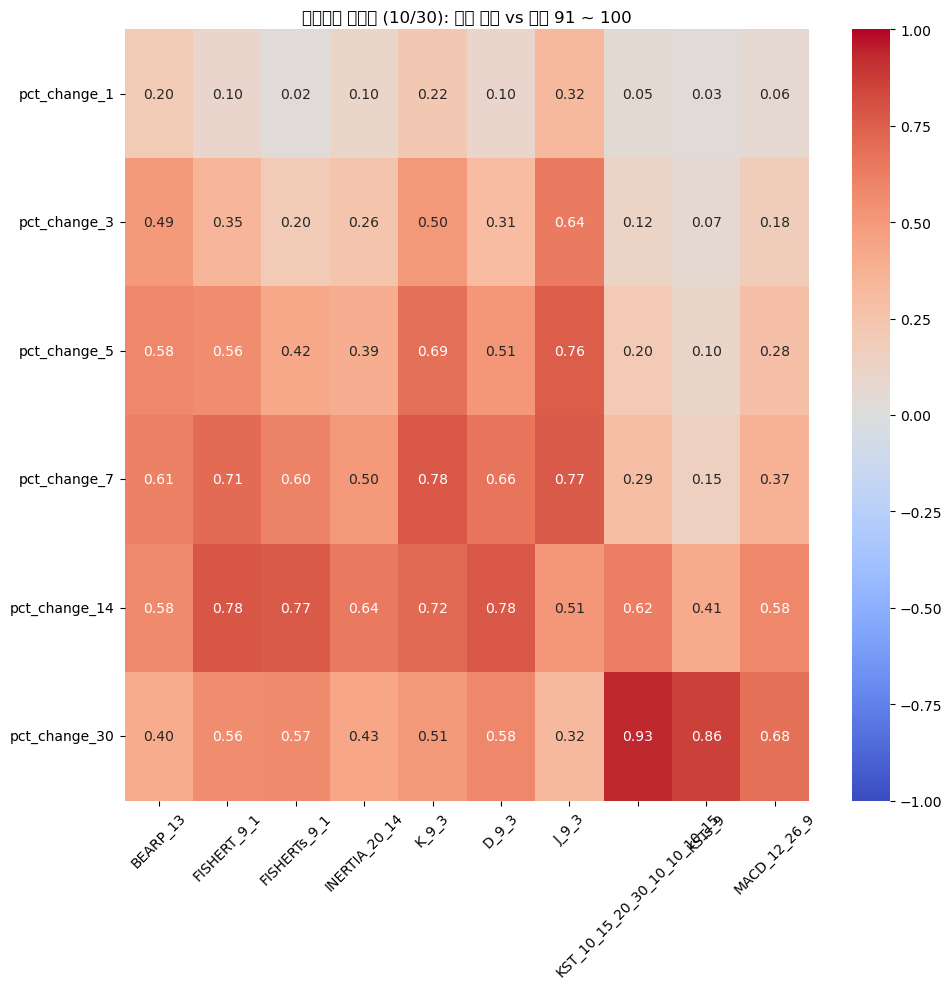

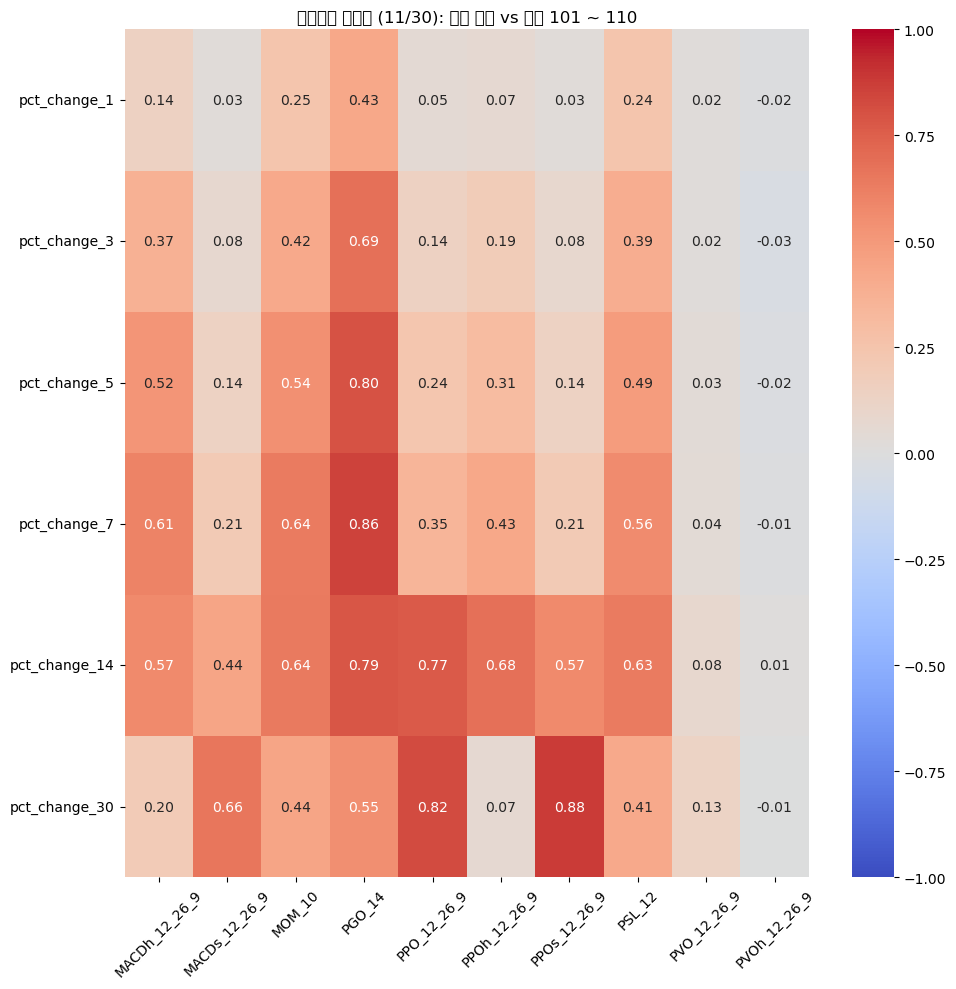

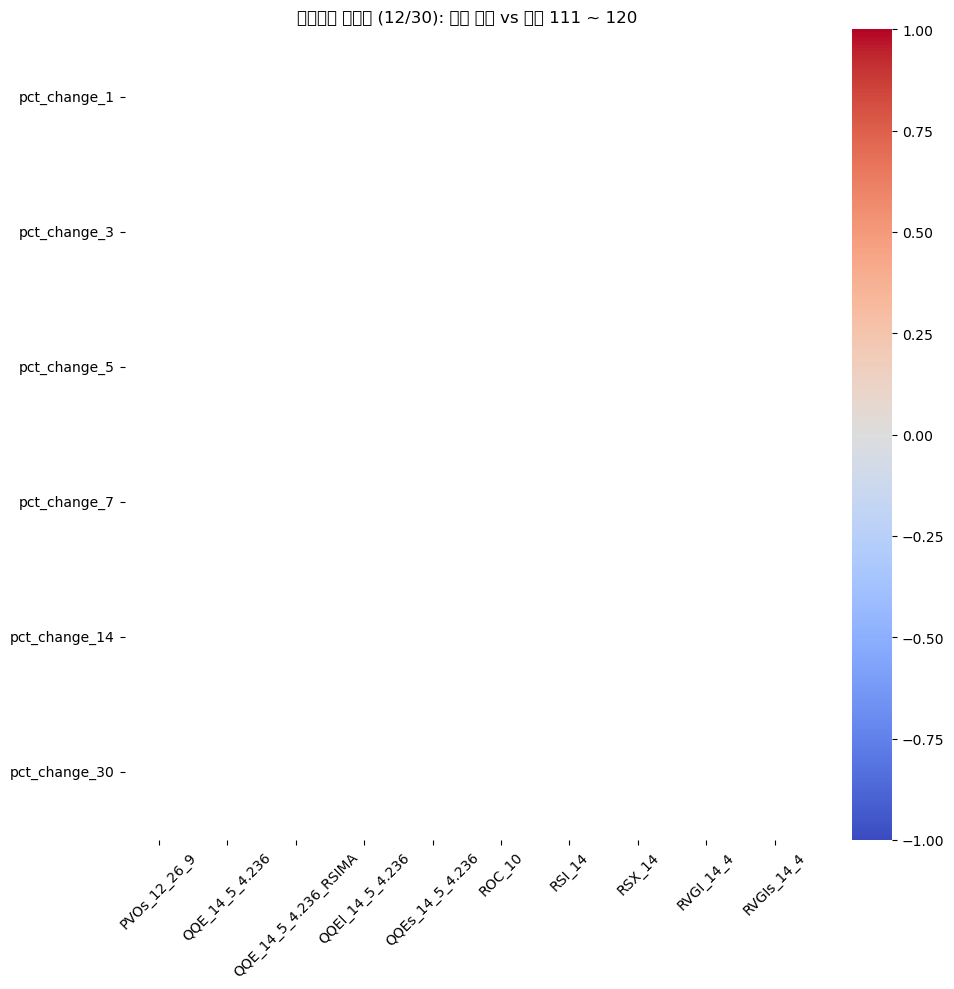

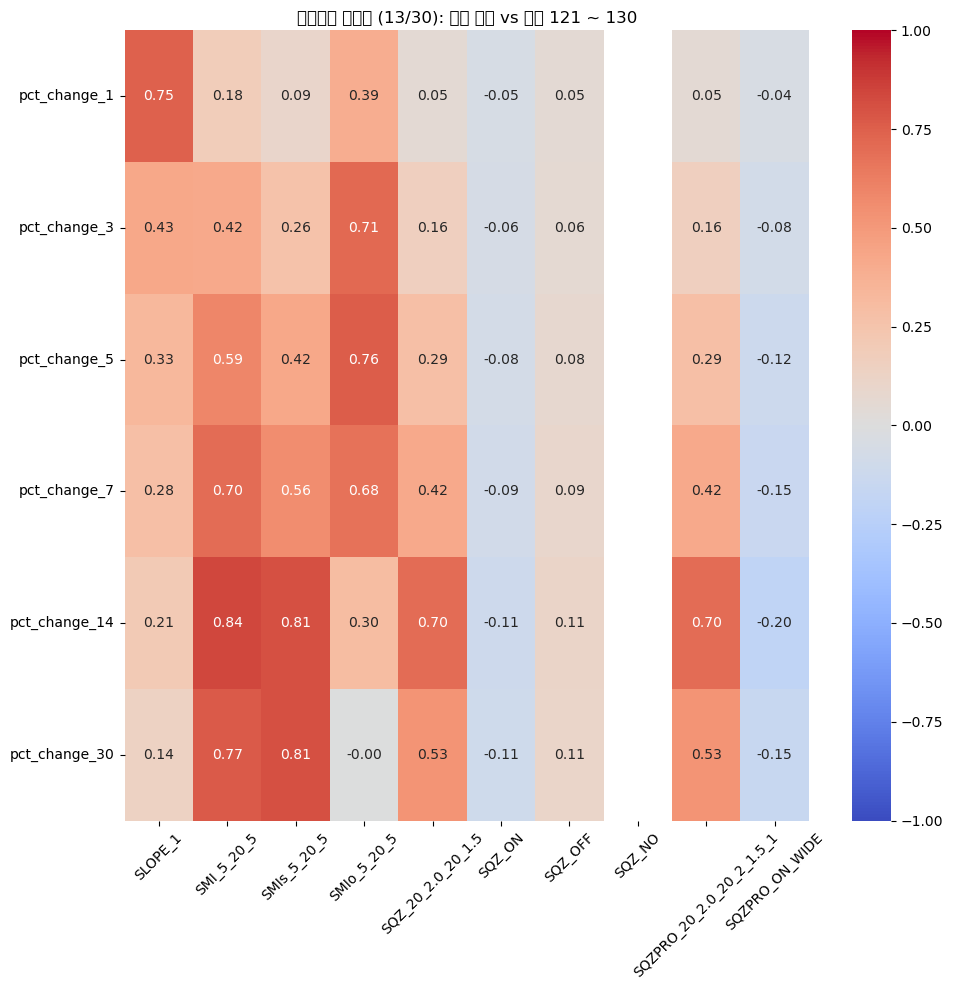

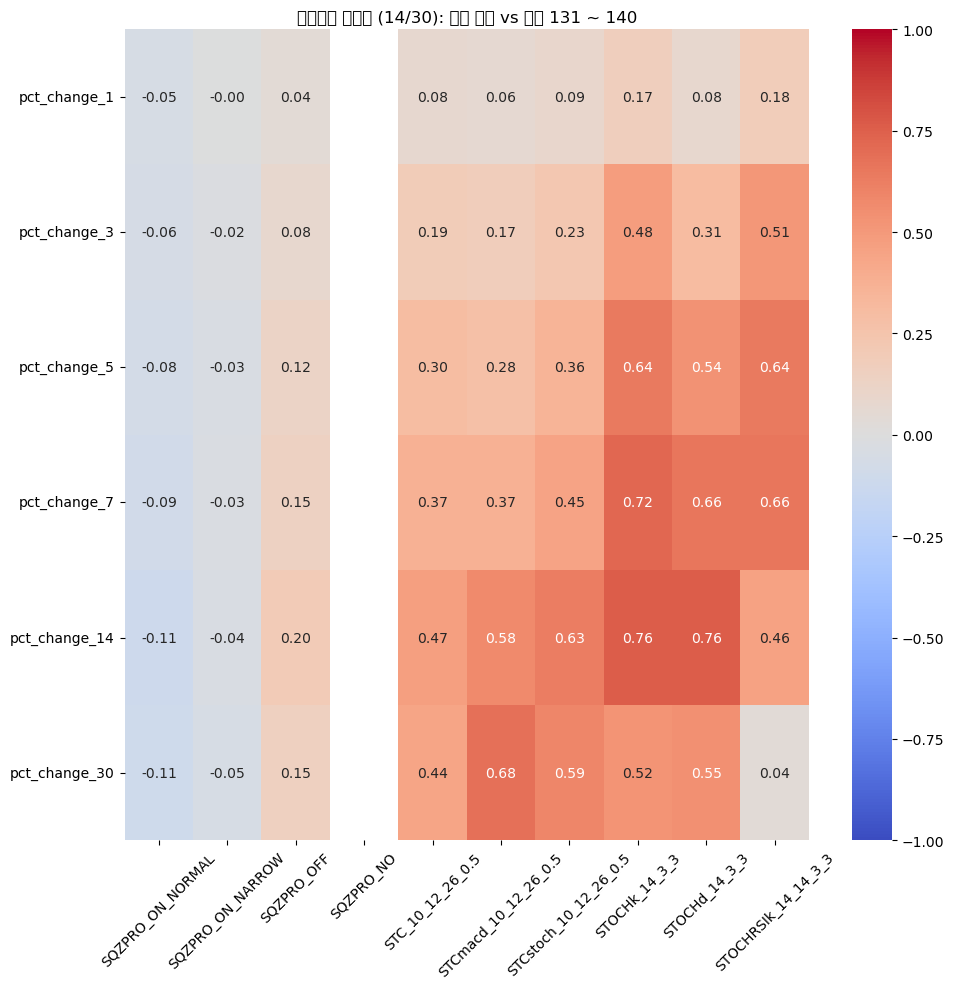

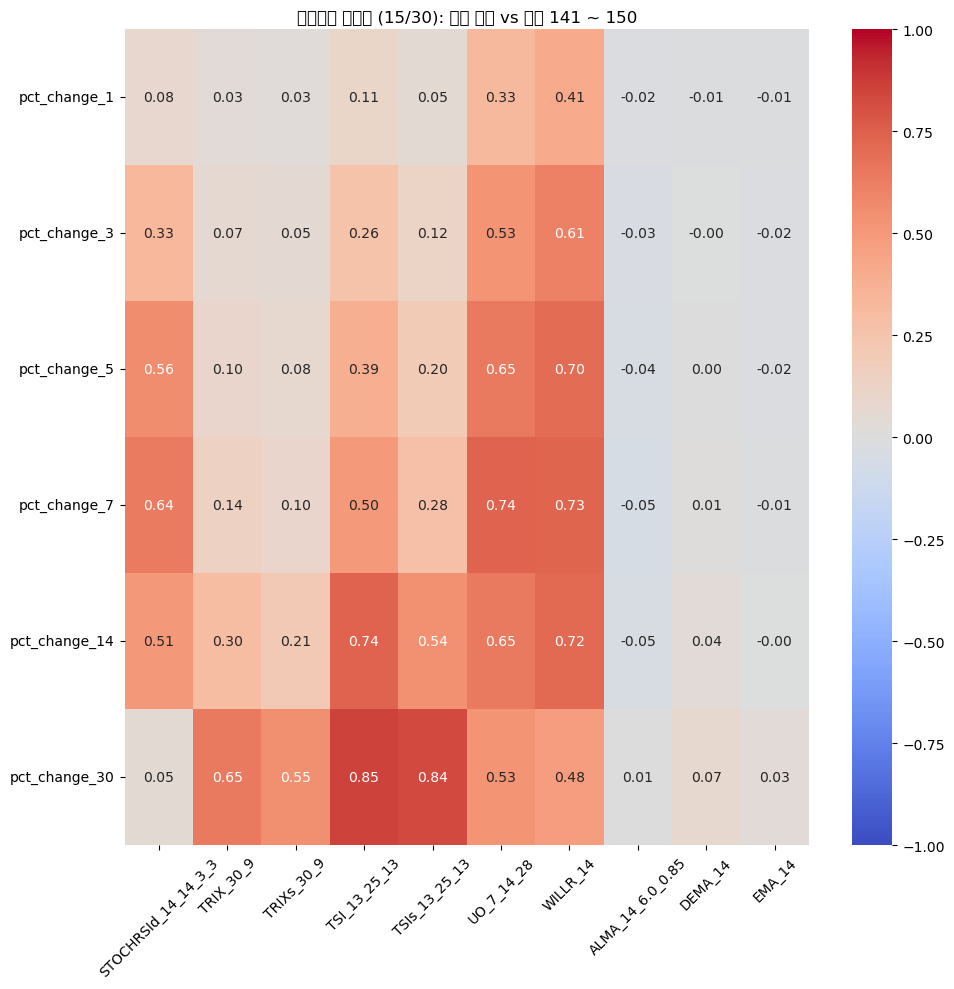

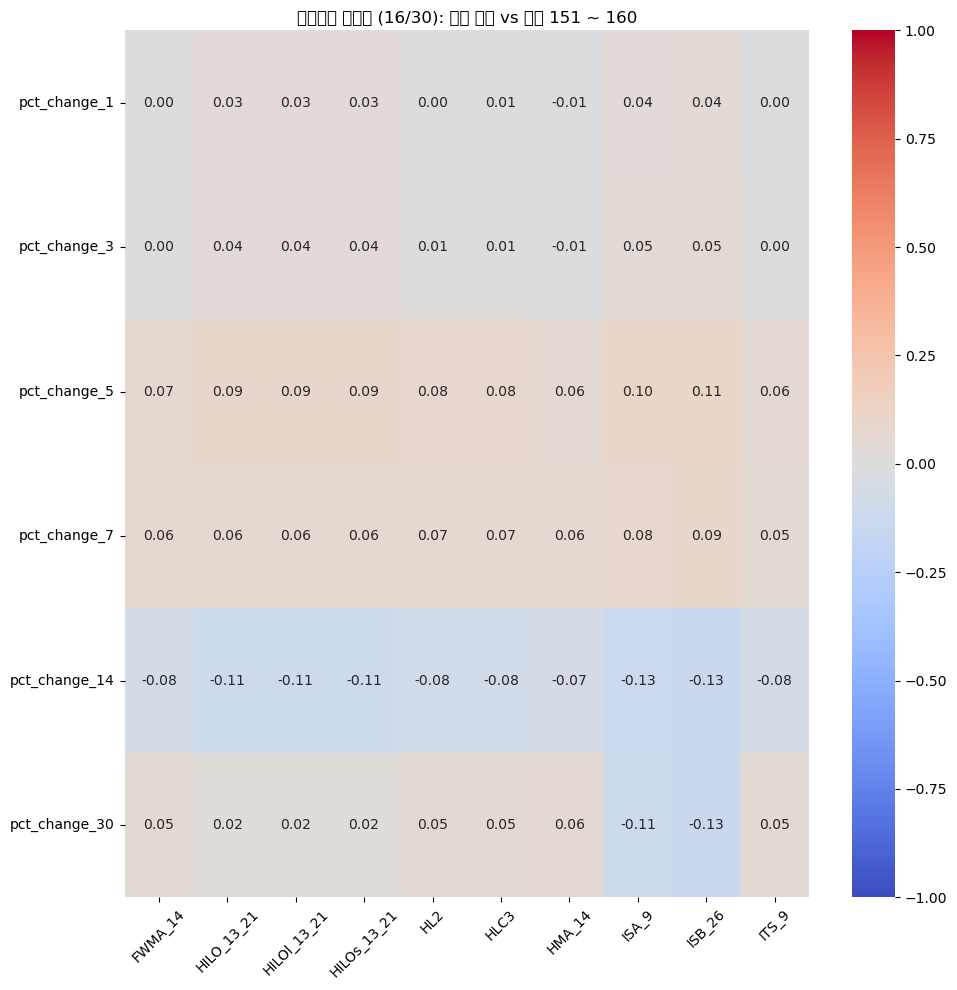

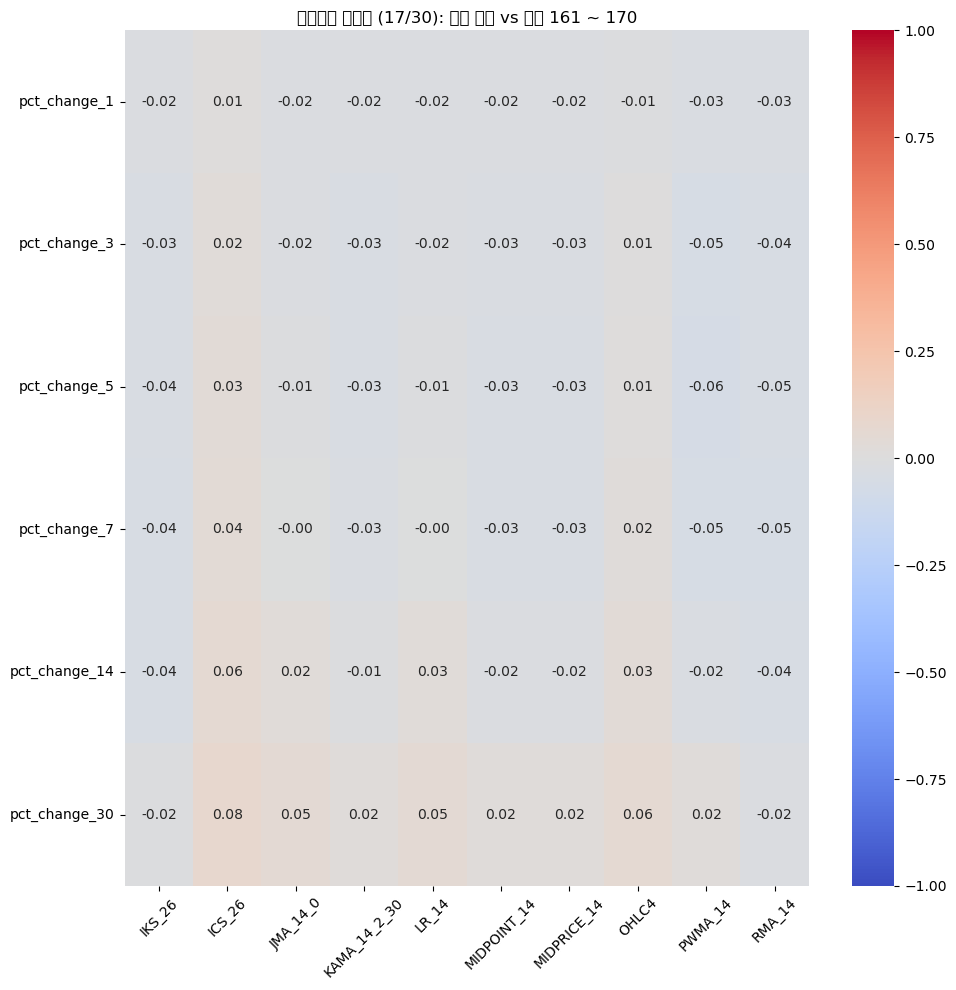

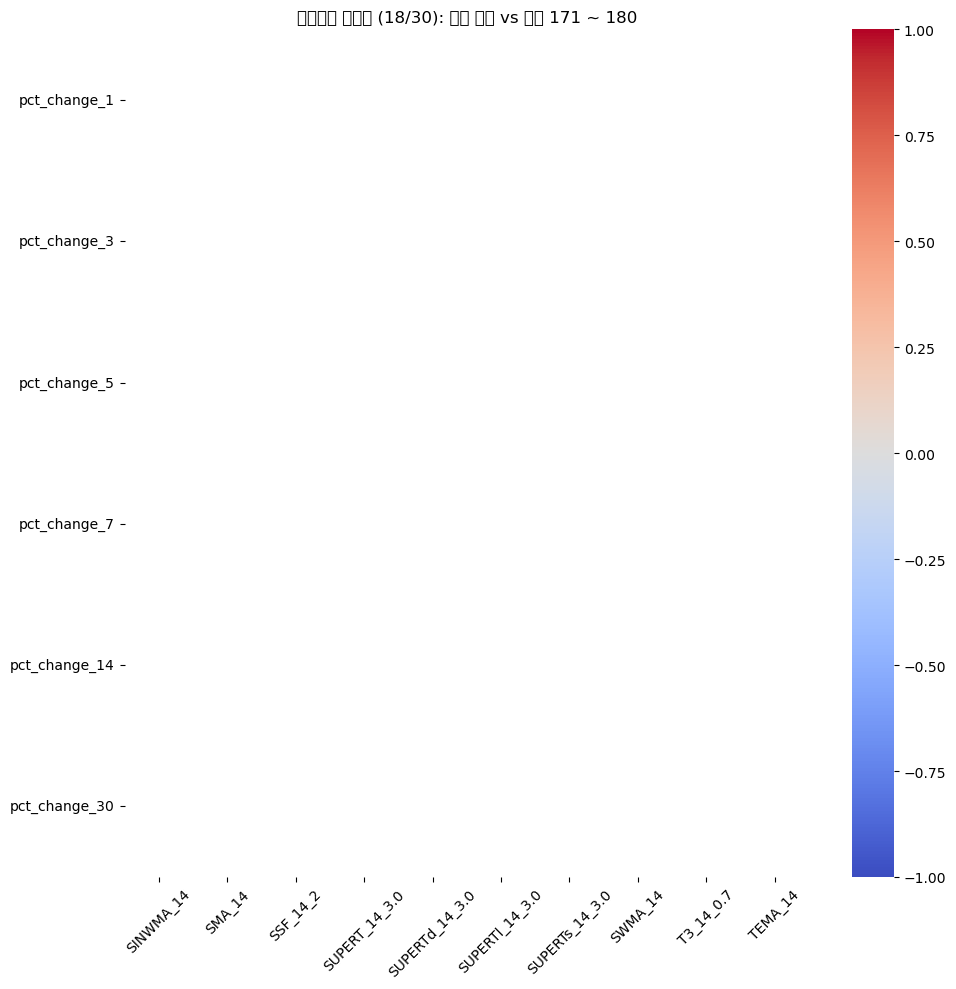

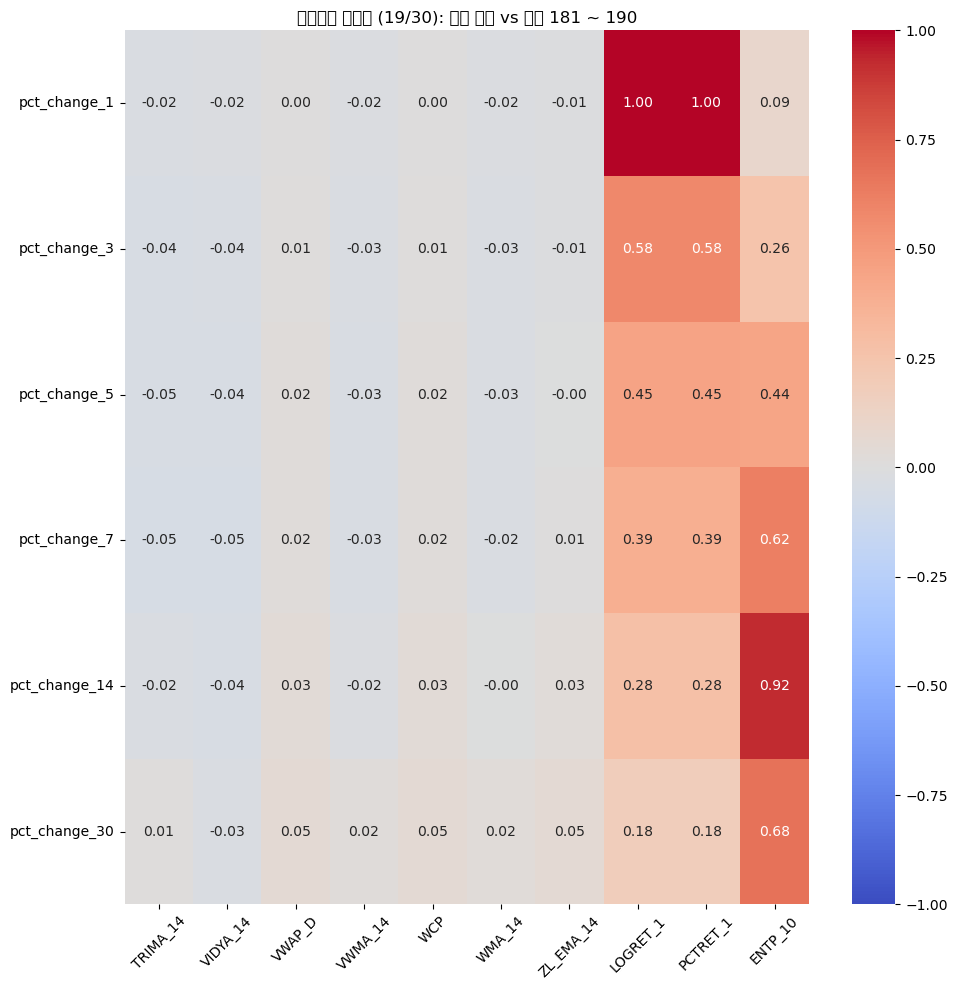

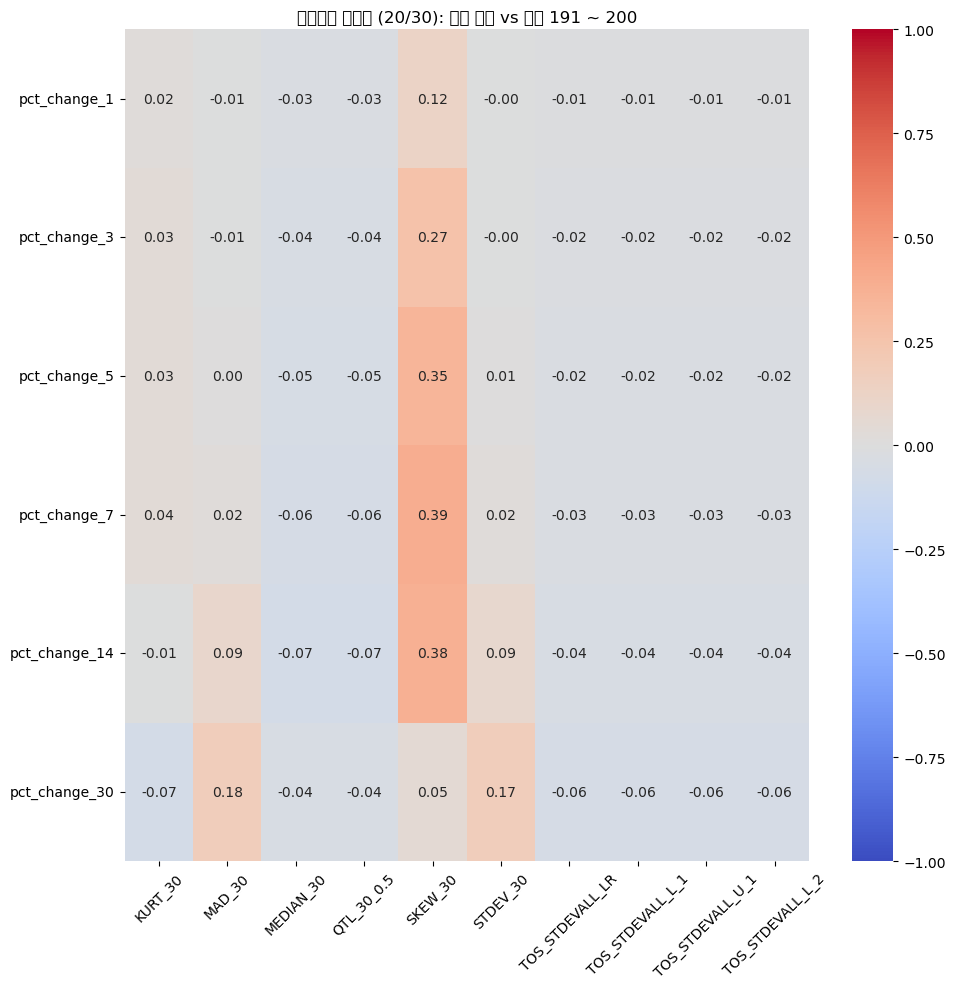

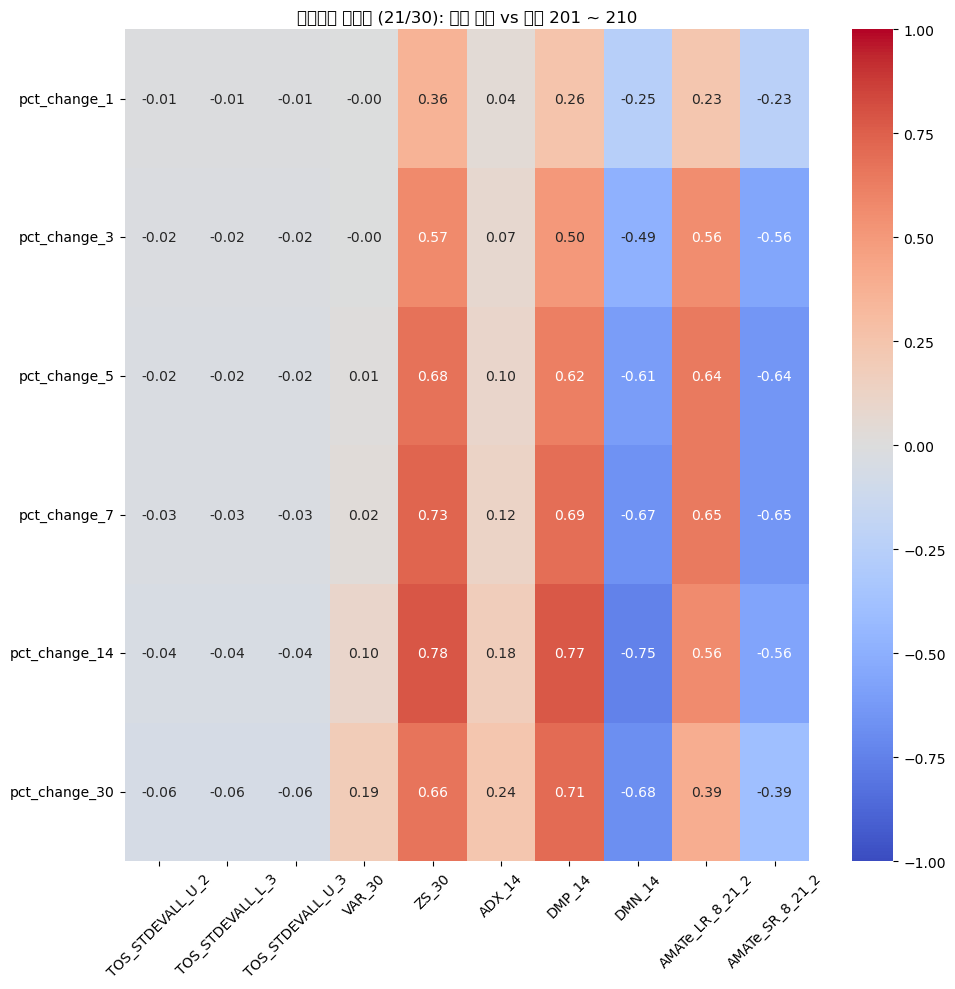

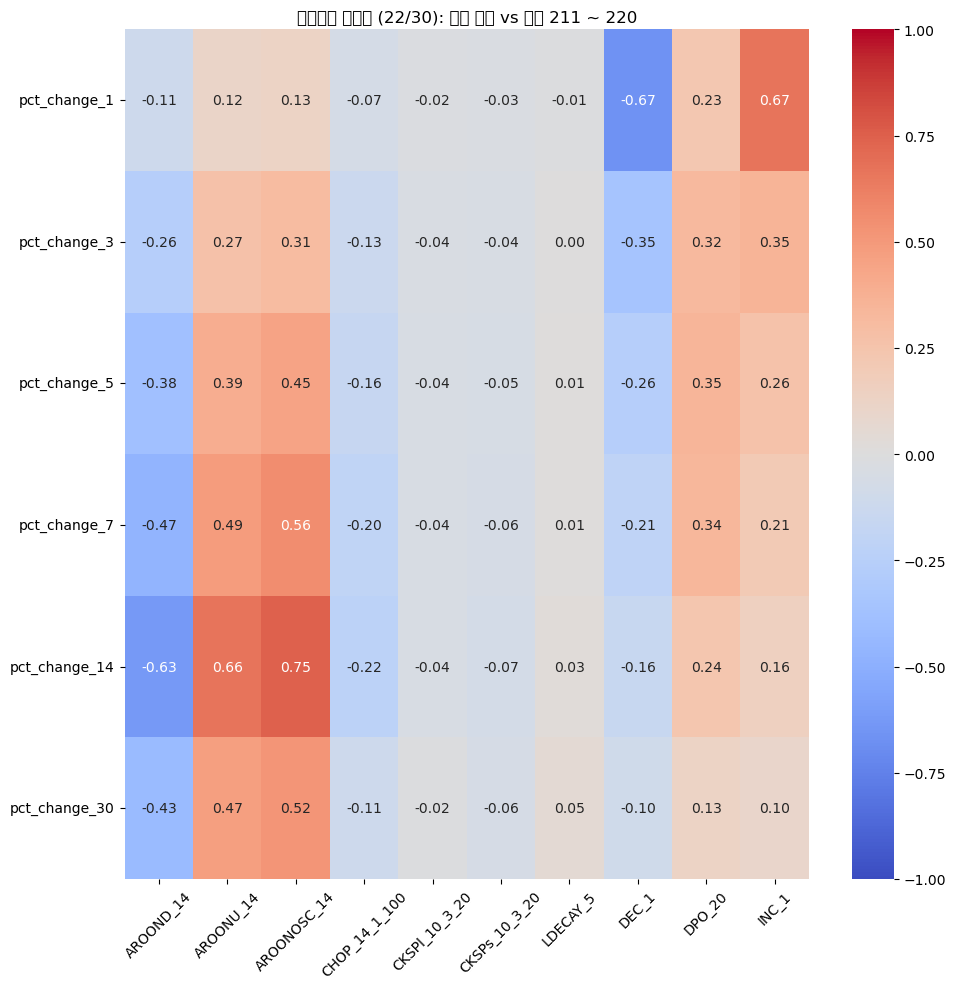

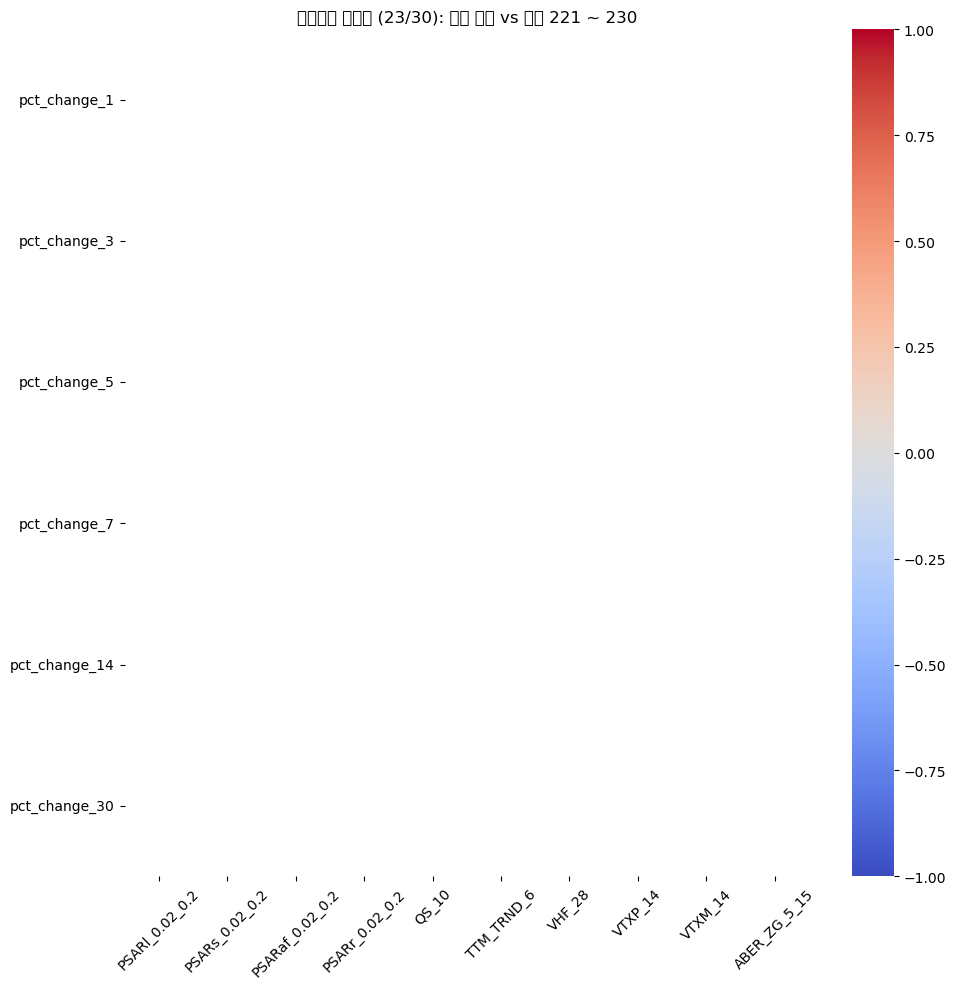

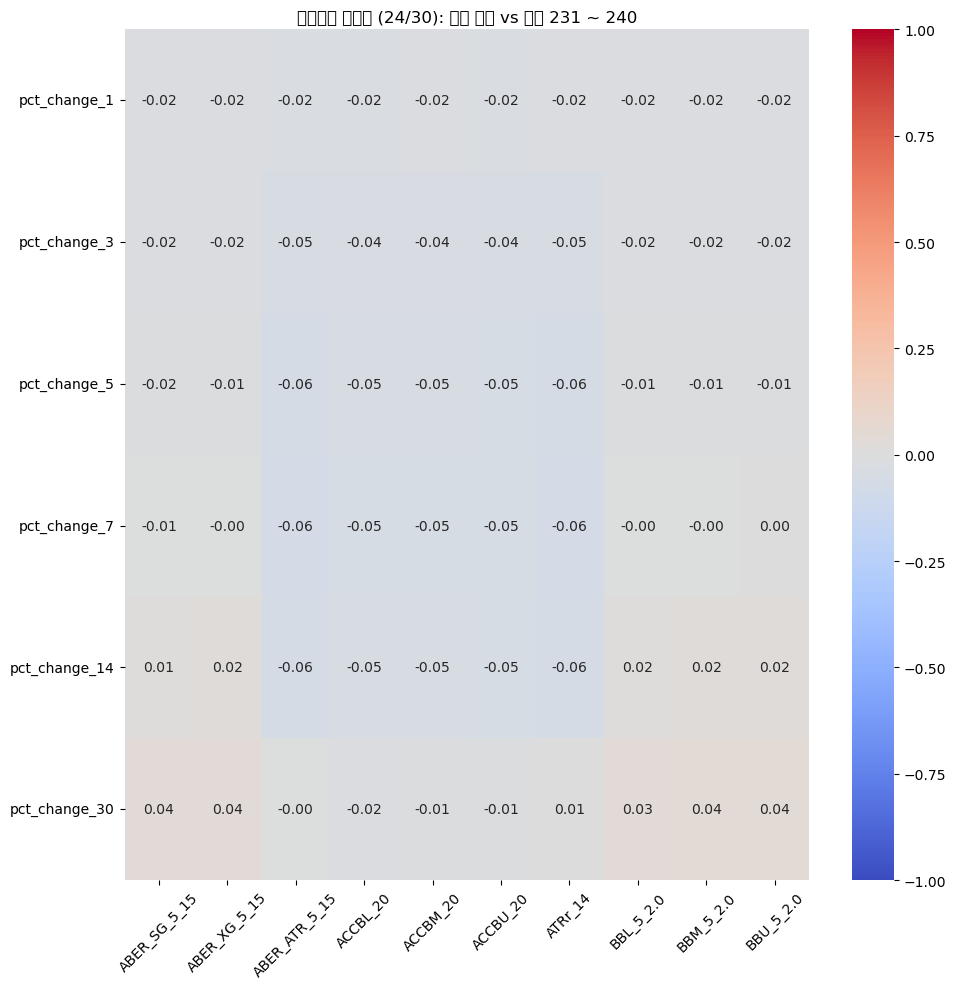

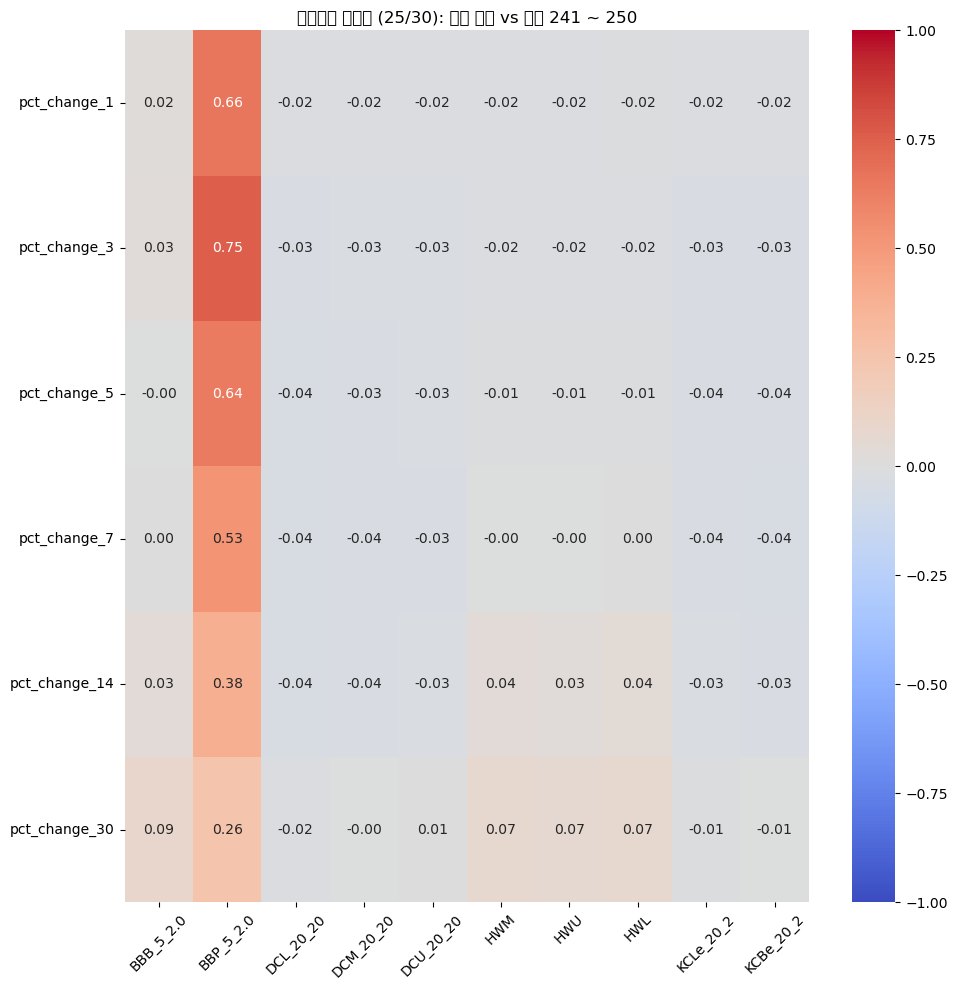

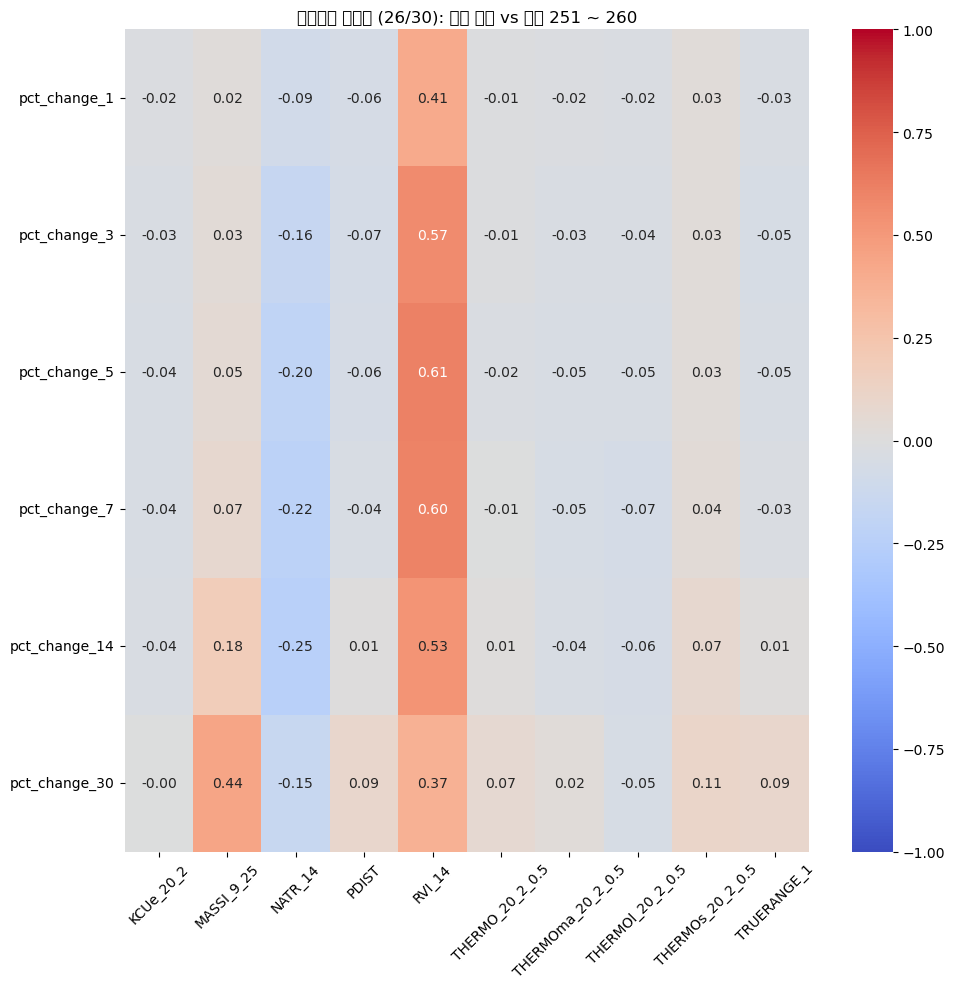

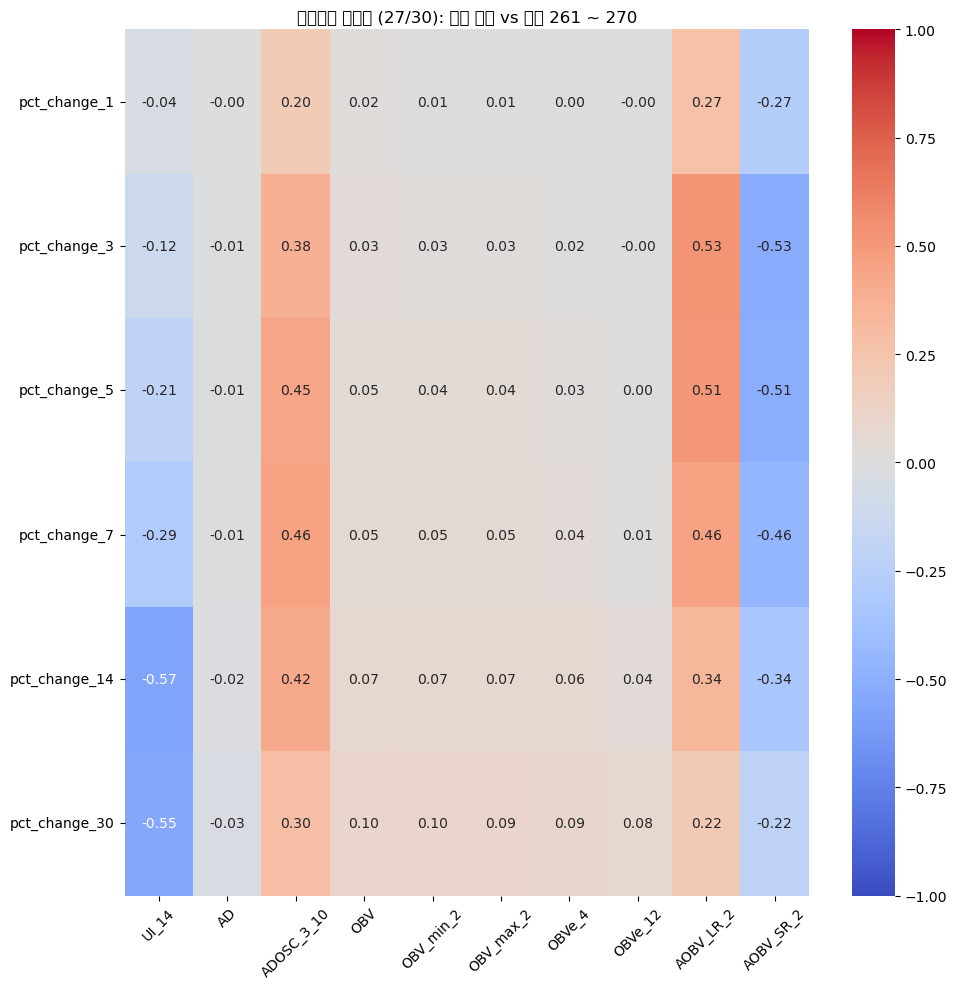

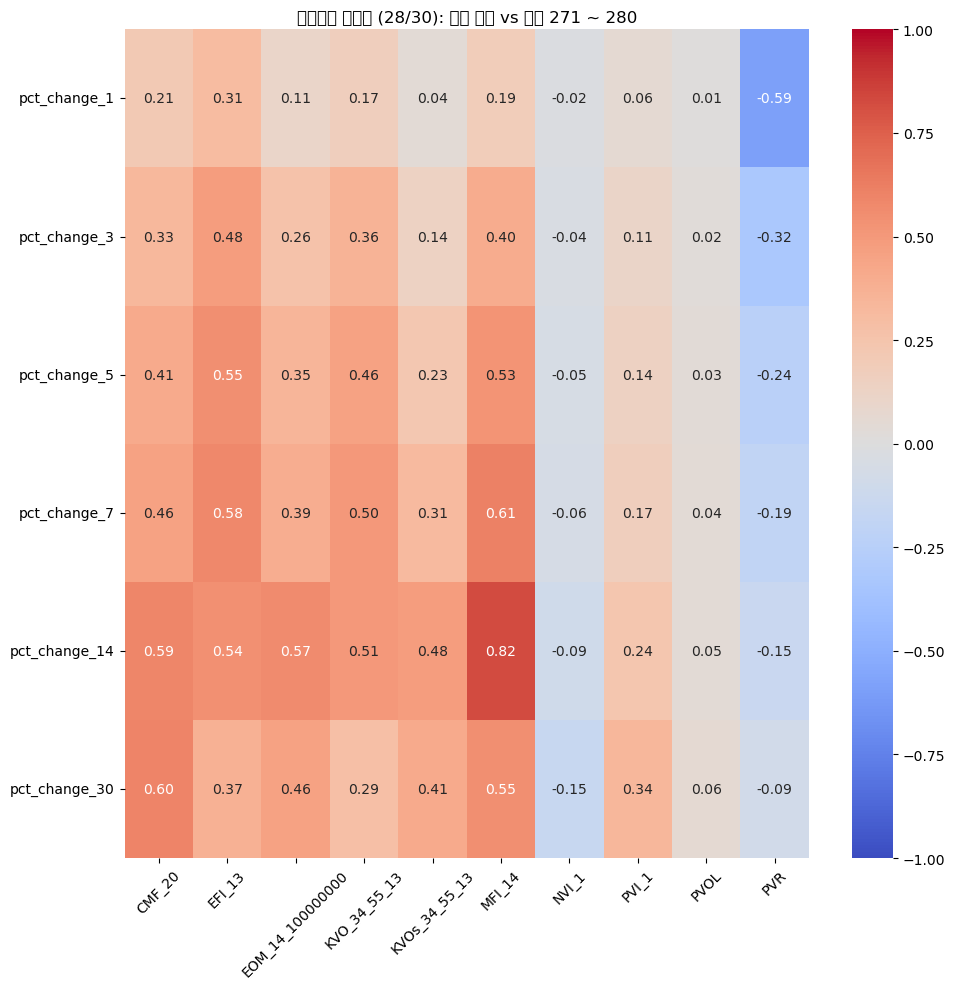

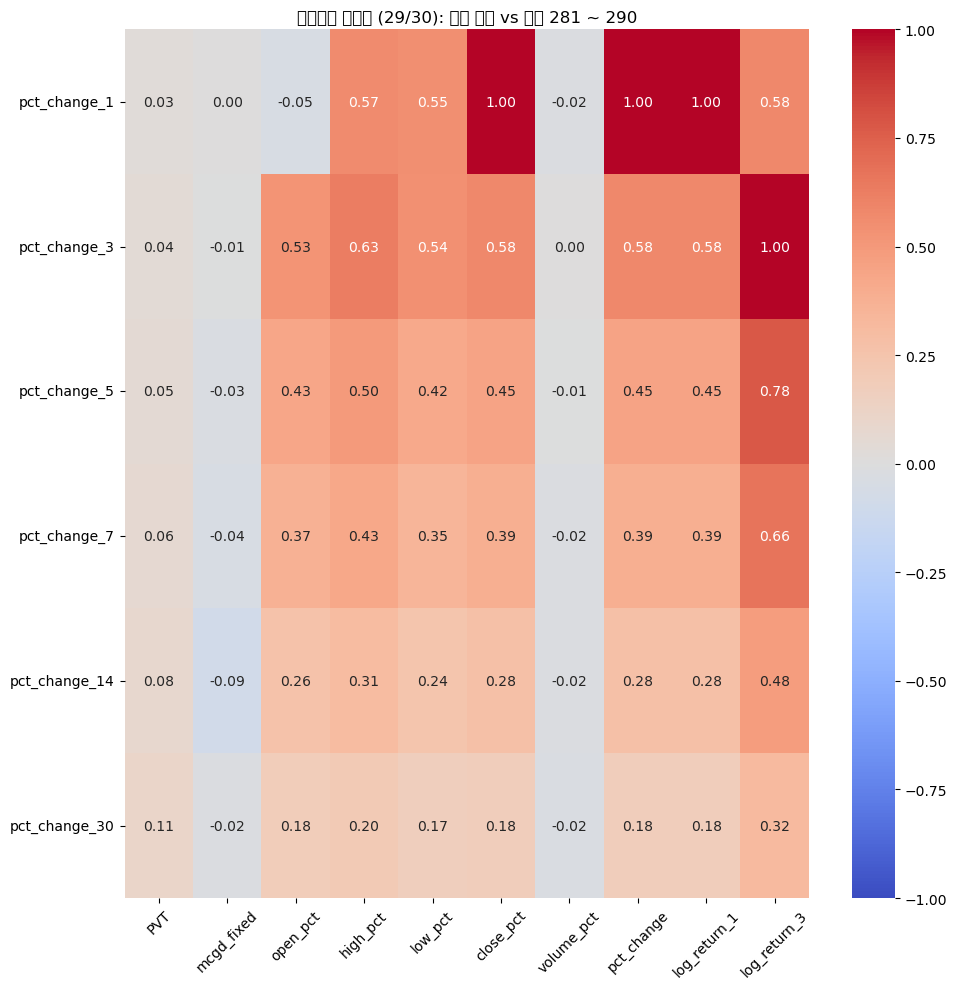

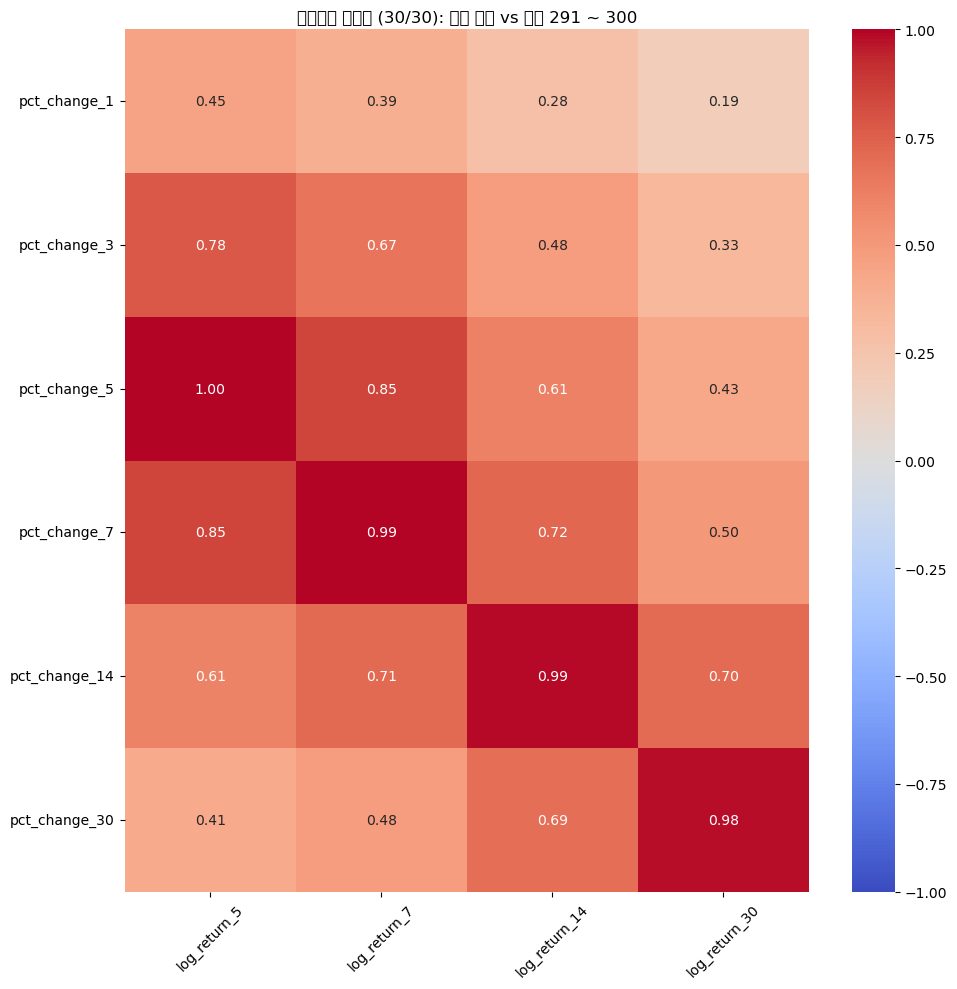

In [43]:
pct_change_cols = [
    'pct_change_1',
    'pct_change_3',
    'pct_change_5',
    'pct_change_7',
    'pct_change_14',
    'pct_change_30'
]
chunked_correlation_heatmaps(ta_df, pct_change_cols, chunk_size=10)